In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import coint

# **São Carlos**

In [ ]:
# Dados de São Carlos

df_sc = pd.read_csv('SC-Dengue.csv')

# Usando iloc para inverter a posiçaõ das linhas
df_sc = df_sc.iloc[::-1]

# Rearanjando o índice
df_sc.reset_index(drop=True, inplace=True)

df_sc

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
0,2010-01-03,201001,4.0,4,4,4,0.000000e+00,1.571808,0,1,...,75.226131,47.285714,26.797094,32.142857,NaN,NaN,NaN,NaN,NaN,66863
1,2010-01-10,201002,5.0,5,5,5,0.000000e+00,1.964760,0,1,...,77.138655,47.142857,25.902427,31.571429,NaN,NaN,NaN,NaN,NaN,66863
2,2010-01-17,201003,5.0,5,5,5,0.000000e+00,1.964760,0,2,...,83.188608,55.428571,25.049954,30.285714,NaN,NaN,NaN,NaN,NaN,66863
3,2010-01-24,201004,5.0,5,5,5,0.000000e+00,1.964760,0,2,...,86.845239,66.000000,24.232317,28.142857,NaN,NaN,NaN,NaN,NaN,66863
4,2010-01-31,201005,2.0,2,2,2,0.000000e+00,0.785904,0,2,...,71.991072,42.285714,27.086309,33.571429,NaN,NaN,NaN,NaN,NaN,66863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2024-06-30,202427,652.0,638,684,632,0.000000e+00,253.797230,0,4,...,67.570529,45.066657,18.419529,24.340900,387.0,NaN,NaN,NaN,NaN,66863
757,2024-07-07,202428,443.0,424,488,416,0.000000e+00,172.441990,0,4,...,73.284057,49.784329,18.977943,25.100229,254.0,NaN,NaN,NaN,NaN,66863
758,2024-07-14,202429,424.0,395,488,385,2.220446e-16,165.046050,0,4,...,62.198329,32.401114,19.023800,26.852471,229.0,NaN,NaN,NaN,NaN,66863
759,2024-07-21,202430,320.0,274,448,254,1.300870e-11,124.563060,0,4,...,47.509857,23.965343,19.395929,27.872529,148.0,NaN,NaN,NaN,NaN,66863


In [ ]:
# Assuming your Excel file is named "data.xlsx" and is located in the current working directory
sc_temp2018 = "temp_sc_2018.xlsx"
sc_temp2019 = "temp_sc_2019.xlsx"
sc_temp2020 = "temp_sc_2020.xlsx"
sc_temp2021 = "temp_sc_2021.xlsx"
sc_temp2022 = "temp_sc_2022.xlsx"
sc_temp2023 = "temp_sc_2023.xlsx"
sc_temp2024 = "temp_sc_2024.xlsx"

# Read the Excel file into a DataFrame
sc2018_df = pd.read_excel(sc_temp2018)
sc2019_df = pd.read_excel(sc_temp2019)
sc2020_df = pd.read_excel(sc_temp2020)
sc2021_df = pd.read_excel(sc_temp2021)
sc2022_df = pd.read_excel(sc_temp2022)
sc2023_df = pd.read_excel(sc_temp2023)
sc2024_df = pd.read_excel(sc_temp2024)

# Specify the CSV file names
sc2018_csv = "sc2018.csv"
sc2019_csv = "sc2019.csv"
sc2020_csv = "sc2020.csv"
sc2021_csv = "sc2021.csv"
sc2022_csv = "sc2022.csv"
sc2023_csv = "sc2023.csv"
sc2024_csv = "sc2024.csv"

# Write the DataFrame to a CSV file
sc2018_df.to_csv(sc2018_csv, index=False)
sc2019_df.to_csv(sc2019_csv, index=False)
sc2020_df.to_csv(sc2020_csv, index=False)
sc2021_df.to_csv(sc2021_csv, index=False)
sc2022_df.to_csv(sc2022_csv, index=False)
sc2023_df.to_csv(sc2023_csv, index=False)
sc2024_df.to_csv(sc2024_csv, index=False)

In [ ]:
sc2018 = pd.read_csv("sc2018.csv")
sc2019 = pd.read_csv("sc2019.csv")
sc2020 = pd.read_csv("sc2020.csv")
sc2021 = pd.read_csv("sc2021.csv")
sc2022 = pd.read_csv("sc2022.csv")
sc2023 = pd.read_csv("sc2023.csv")
sc2024 = pd.read_csv("sc2024.csv")

In [ ]:
# Concatenando os arquivos, mas eliminando as linhas inúteis

sc2018 = sc2018.iloc[8:]
sc2019 = sc2019.iloc[8:]
sc2020 = sc2020.iloc[8:]
sc2021 = sc2021.iloc[8:]
sc2022 = sc2022.iloc[8:]
sc2023 = sc2023.iloc[8:]
sc2024 = sc2024.iloc[8:]

temp_sc = pd.concat([sc2018, sc2019, sc2020, sc2021, sc2022, sc2023, sc2024])
temp_sc

,REGIÃO:,SE,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,REGI?O:,REGIAO:
8,2018-01-01 00:00:00,00:00:00,0,918,918.1,917.2,0,19.4,18.5,19.5,...,18.6,18.4,94,94,94,350,4.8,1.1,NaN,NaN
9,2018-01-01 00:00:00,01:00:00,0,918.2,918.2,917.9,-9999,19.2,18.3,19.4,...,18.5,18.3,94,94,94,337,4.2,1,NaN,NaN
10,2018-01-01 00:00:00,02:00:00,0,918.4,918.4,918.2,-9999,19.2,18.2,19.3,...,18.4,18.2,95,94,94,34,3.4,1.2,NaN,NaN
11,2018-01-01 00:00:00,03:00:00,0,918.5,918.6,918.4,-9999,19,18.1,19.2,...,18.2,18,95,94,94,3,3.8,1,NaN,NaN
12,2018-01-01 00:00:00,04:00:00,0,917.7,918.5,917.7,-9999,19.3,18.3,19.3,...,18.3,18.1,94,94,94,21,4.3,1.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,NaN,1900 UTC,0,918.8,919.2,918.8,1334,29.3,12.8,30.9,...,13.9,12.2,39,33,36,331,4.5,1.2,NaN,2024-04-30 00:00:00
2908,NaN,2000 UTC,0,919,919.1,918.8,576.8,28.6,14.3,29.4,...,14.3,13,42,36,42,25,4.5,0,NaN,2024-04-30 00:00:00
2909,NaN,2100 UTC,0,919.7,919.7,919,73.5,25.8,14.8,28.6,...,15.1,13.7,51,40,51,31,0,0,NaN,2024-04-30 00:00:00
2910,NaN,2200 UTC,0,920.3,920.3,919.7,NaN,24,14.8,25.8,...,14.9,14.7,56,51,56,13,0,0,NaN,2024-04-30 00:00:00


In [ ]:
temp_sc = temp_sc.reset_index(drop=True)
temp_sc = temp_sc.iloc[:, [2, 7]]
temp_sc = temp_sc[:-48]
temp_sc = temp_sc.rename(columns={'Unnamed: 2': "precipitação", 'Unnamed: 7': "temperatura"})

temp_sc

,precipitação,temperatura
0,0,19.4
1,0,19.2
2,0,19.2
3,0,19
4,0,19.3
...,...,...
55435,0,28.3
55436,0,26.3
55437,0,24.1
55438,0,22.6


In [ ]:
# Convert columns to numeric type for processing
temp_sc['precipitação'] = pd.to_numeric(temp_sc['precipitação'], errors='coerce')
temp_sc['temperatura'] = pd.to_numeric(temp_sc['temperatura'], errors='coerce')

# Define the number of lines per group (168 lines for a week)
lines_per_group = 168

# Calculate the total number of groups (weeks)
num_groups = len(temp_sc) // lines_per_group

# Create an empty list to store the aggregated DataFrames
aggregated_dfs = []

# Iterate through each group (week)
for i in range(num_groups):
    # Determine the start and end indices for the current group
    start_index = i * lines_per_group
    end_index = (i + 1) * lines_per_group

    # Select data for the current group
    group_data = temp_sc.iloc[start_index:end_index]

    # Calculate the sum of 'precipitação' and mean of 'temperatura' for the current group
    sum_precipitation = group_data['precipitação'].sum()
    mean_temperature = group_data['temperatura'].mean()

    # Create a DataFrame with the calculated values for the current group
    group_result_df = pd.DataFrame({'Precipitação': [sum_precipitation],
                                    'Temperatura média': [mean_temperature]})

    # Append the DataFrame to the list
    aggregated_dfs.append(group_result_df)

# Concatenate all DataFrames along rows to form the final aggregated DataFrame
temp_sc = pd.concat(aggregated_dfs, ignore_index=True)
temp_sc

,Precipitação,Temperatura média
0,58.2,21.502381
1,97.4,21.226786
2,14.6,23.727381
3,31.8,24.260119
4,41.6,22.345833
...,...,...
325,19.0,21.546429
326,13.0,23.841071
327,2.8,23.230539
328,7.6,22.402381


In [ ]:
# Add two empty columns to the DataFrame
df_sc['Precipitação'] = None
df_sc['Temperatura média'] = None

# Fill the last 330 rows of the main DataFrame with values from the values DataFrame
if len(df_sc) >= 330 and len(temp_sc) >= 330:
    df_sc.iloc[-330:, df_sc.columns.get_loc('Precipitação')] = temp_sc['Precipitação'].values
    df_sc.iloc[-330:, df_sc.columns.get_loc('Temperatura média')] = temp_sc['Temperatura média'].values

# Display the DataFrame to verify the changes
df_sc

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,Precipitação,Temperatura média
0,2010-01-03,201001,4.0,4,4,4,0.000000e+00,1.571808,0,1,...,26.797094,32.142857,NaN,NaN,NaN,NaN,NaN,66863,None,None
1,2010-01-10,201002,5.0,5,5,5,0.000000e+00,1.964760,0,1,...,25.902427,31.571429,NaN,NaN,NaN,NaN,NaN,66863,None,None
2,2010-01-17,201003,5.0,5,5,5,0.000000e+00,1.964760,0,2,...,25.049954,30.285714,NaN,NaN,NaN,NaN,NaN,66863,None,None
3,2010-01-24,201004,5.0,5,5,5,0.000000e+00,1.964760,0,2,...,24.232317,28.142857,NaN,NaN,NaN,NaN,NaN,66863,None,None
4,2010-01-31,201005,2.0,2,2,2,0.000000e+00,0.785904,0,2,...,27.086309,33.571429,NaN,NaN,NaN,NaN,NaN,66863,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2024-06-30,202427,652.0,638,684,632,0.000000e+00,253.797230,0,4,...,18.419529,24.340900,387.0,NaN,NaN,NaN,NaN,66863,19.0,21.546429
757,2024-07-07,202428,443.0,424,488,416,0.000000e+00,172.441990,0,4,...,18.977943,25.100229,254.0,NaN,NaN,NaN,NaN,66863,13.0,23.841071
758,2024-07-14,202429,424.0,395,488,385,2.220446e-16,165.046050,0,4,...,19.023800,26.852471,229.0,NaN,NaN,NaN,NaN,66863,2.8,23.230539
759,2024-07-21,202430,320.0,274,448,254,1.300870e-11,124.563060,0,4,...,19.395929,27.872529,148.0,NaN,NaN,NaN,NaN,66863,7.6,22.402381


In [ ]:
# Adicionar um pequeno valor para evitar log(0)
df_sc['log_precipitation'] = np.log(df_sc['Precipitação'].replace(0, 1e-6))

<ipython-input-11-c8b543c77b57>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sc['log_precipitation'] = np.log(df_sc['Precipitação'].replace(0, 1e-6))
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Analisando as medidas de similaridade

**Correlação linear de pearson defasada:** mede a correlação entre duas séries analizando-as com base em defasagens temporais pré-fixadas.

<Axes: >

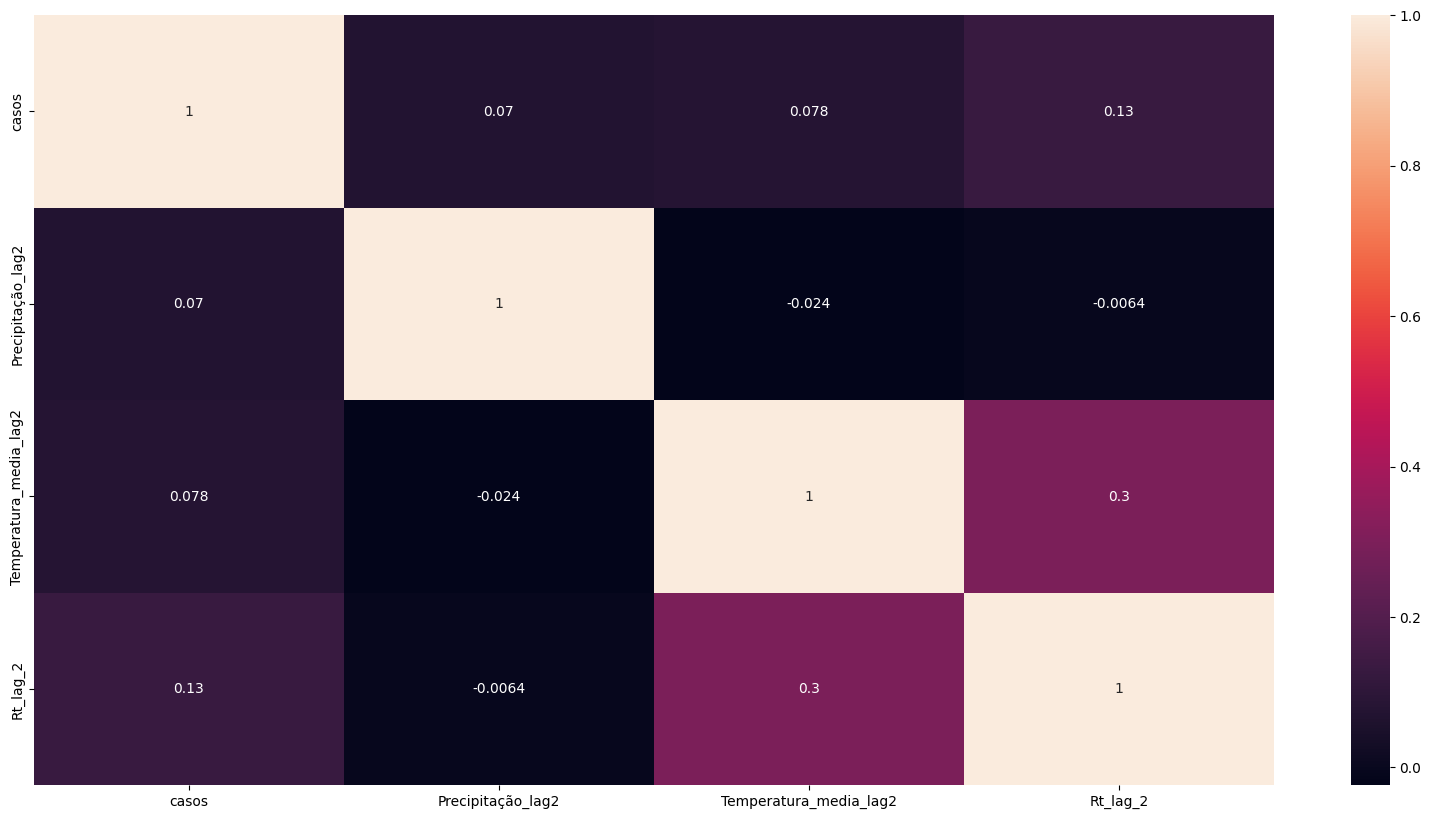

In [ ]:
# Criar as variáveis defasadas de Precipitação e Temperatura média em duas observações
df_sc['Precipitação_lag2'] = df_sc['Precipitação'].shift(2)
df_sc['Temperatura_media_lag2'] = df_sc['tempmed'].shift(2)
df_sc['Rt_lag_2'] = df_sc['Rt'].shift(2)

# Remover linhas com NaN resultantes do lag
df_sc_lagged = df_sc.dropna(subset=['Precipitação_lag2', 'Temperatura_media_lag2', 'casos', 'Rt_lag_2'])

# Calculando a correlação entre 'casos' e as variáveis defasadas
corr = df_sc_lagged[['casos', 'Precipitação_lag2', 'Temperatura_media_lag2', 'Rt_lag_2']].corr()

plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True) # Mapa de calor, onde  annot insere os valores dentro das ilhas

Indicativo de uma correlação fraca entre as variáveis.

**Correlação cruzada:** observa a interação entre duas séries temporais em diferentes lags.

In [ ]:
cross_corr = np.correlate(df_sc['casos'], df_sc['tempmed'], mode='full')
cross_corr

array([   80.86173333,   178.66088095,   274.15200952, ...,
       20177.64174843, 10199.67990543,  3510.41933271])

**Dinamic Time Warping(DTW):** mede a similaridade entre duas séries levando em consideração o espaçamento entre as observações.

In [ ]:
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.9 MB/s eta 0:00:00


In [ ]:
from dtaidistance import dtw
distance = dtw.distance(df_sc['casos'], df_sc['Rt'])
distance

7116.133953835053

**Distância euclidiana:** leva em consideração o quadrado da distância entre duas observações (não muito útil no contexto de séries temporais).

In [ ]:
euclidean_distance = np.sqrt(np.sum((df_sc['casos'] - df_sc['tempmed']) ** 2))
euclidean_distance

6972.219852357034

**Correlação de lags:** corresponde ao valor máximo da correlação cruzada.

In [ ]:
lag_corr = max(cross_corr)
print(f"Correlação de lags: {lag_corr}")

Correlação de lags: 844113.9366588405


**Causalidade de Granger:** útil na verificação da capacidade de uma série em prever a outra.

In [ ]:
# Remove rows with NaN or infinite values
df_sc_cleaned = df_sc[['casos', 'tempmed', 'Rt', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()

# Ensure data alignment and format for the causality test
data_for_test = np.column_stack([df_sc_cleaned['casos'], df_sc_cleaned['tempmed']])

# Perform Granger causality tests with a lag of up to 2
result = grangercausalitytests(data_for_test, maxlag=2, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3465  , p=0.0042  , df_denom=295, df_num=1
ssr based chi2 test:   chi2=8.4314  , p=0.0037  , df=1
likelihood ratio test: chi2=8.3143  , p=0.0039  , df=1
parameter F test:         F=8.3465  , p=0.0042  , df_denom=295, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9745  , p=0.3786  , df_denom=292, df_num=2
ssr based chi2 test:   chi2=1.9823  , p=0.3711  , df=2
likelihood ratio test: chi2=1.9757  , p=0.3724  , df=2
parameter F test:         F=0.9745  , p=0.3786  , df_denom=292, df_num=2


<ipython-input-35-1b3a28b39c9c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sc_cleaned = df_sc[['casos', 'tempmed', 'Rt', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
# Remove rows with NaN or infinite values
df_sc_cleaned = df_sc[['casos', 'tempmed', 'Rt', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()

# Ensure data alignment and format for the causality test
data_for_test = np.column_stack([df_sc_cleaned['casos'], df_sc_cleaned['Rt']])

# Perform Granger causality tests with a lag of up to 2
result = grangercausalitytests(data_for_test, maxlag=2, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7579  , p=0.0057  , df_denom=295, df_num=1
ssr based chi2 test:   chi2=7.8368  , p=0.0051  , df=1
likelihood ratio test: chi2=7.7355  , p=0.0054  , df=1
parameter F test:         F=7.7579  , p=0.0057  , df_denom=295, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2767  , p=0.2805  , df_denom=292, df_num=2
ssr based chi2 test:   chi2=2.5972  , p=0.2729  , df=2
likelihood ratio test: chi2=2.5859  , p=0.2745  , df=2
parameter F test:         F=1.2767  , p=0.2805  , df_denom=292, df_num=2


<ipython-input-36-930bf2656d8e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sc_cleaned = df_sc[['casos', 'tempmed', 'Rt', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
# Remove rows with NaN or infinite values
df_sc_cleaned = df_sc[['casos', 'tempmed', 'Rt', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()

# Ensure data alignment and format for the causality test
data_for_test = np.column_stack([df_sc_cleaned['casos'], df_sc_cleaned['Precipitação']])

# Perform Granger causality tests with a lag of up to 2
result = grangercausalitytests(data_for_test, maxlag=2, verbose=True)

<ipython-input-37-a934c6c5920d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sc_cleaned = df_sc[['casos', 'tempmed', 'Rt', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0225  , p=0.8808  , df_denom=295, df_num=1
ssr based chi2 test:   chi2=0.0227  , p=0.8801  , df=1
likelihood ratio test: chi2=0.0227  , p=0.8801  , df=1
parameter F test:         F=0.0225  , p=0.8808  , df_denom=295, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0297  , p=0.9708  , df_denom=292, df_num=2
ssr based chi2 test:   chi2=0.0603  , p=0.9703  , df=2
likelihood ratio test: chi2=0.0603  , p=0.9703  , df=2
parameter F test:         F=0.0297  , p=0.9708  , df_denom=292, df_num=2


In [ ]:
# Remove rows with NaN or infinite values
df_sc_cleaned = df_sc[['casos', 'tempmed', 'Rt', 'log_precipitation']].replace([np.inf, -np.inf], np.nan).dropna()

# Ensure data alignment and format for the causality test
data_for_test = np.column_stack([df_sc_cleaned['casos'], df_sc_cleaned['log_precipitation']])

# Perform Granger causality tests with a lag of up to 2
result = grangercausalitytests(data_for_test, maxlag=2, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5050  , p=0.4779  , df_denom=285, df_num=1
ssr based chi2 test:   chi2=0.5103  , p=0.4750  , df=1
likelihood ratio test: chi2=0.5098  , p=0.4752  , df=1
parameter F test:         F=0.5050  , p=0.4779  , df_denom=285, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5151  , p=0.5980  , df_denom=282, df_num=2
ssr based chi2 test:   chi2=1.0485  , p=0.5920  , df=2
likelihood ratio test: chi2=1.0466  , p=0.5926  , df=2
parameter F test:         F=0.5151  , p=0.5980  , df_denom=282, df_num=2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


**Coherence:** verifica a periodocidade das séries.

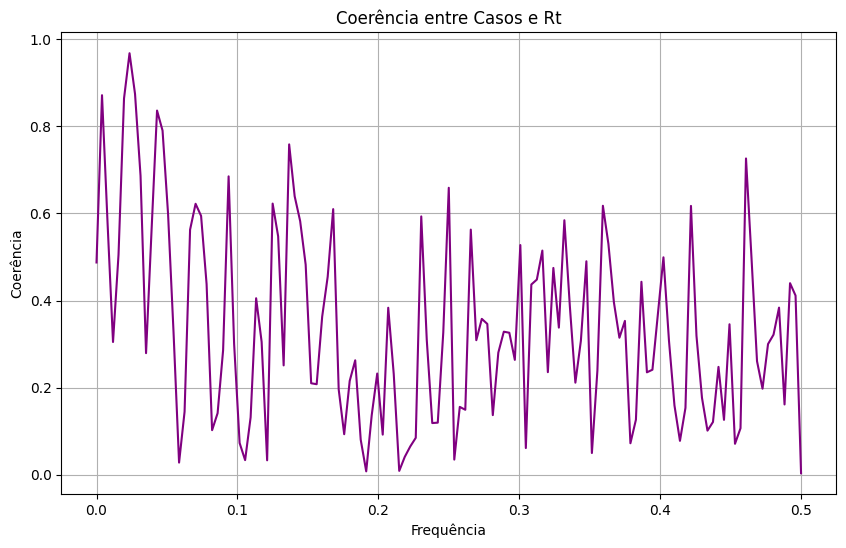

In [ ]:
from scipy.signal import coherence

# Drop NaN and infinite values in 'casos' and 'tempmed'
df_sc_cleaned = df_sc[['casos', 'Rt']].replace([np.inf, -np.inf], np.nan).dropna()

# Calculate coherence between 'casos' and 'tempmed'
frequencies, coherence_values = coherence(df_sc_cleaned['casos'], df_sc_cleaned['Rt'], fs=1)

# Plot the coherence
plt.figure(figsize=(10, 6))
plt.plot(frequencies, coherence_values, color='purple')
plt.title('Coerência entre Casos e Rt')
plt.xlabel('Frequência')
plt.ylabel('Coerência')
plt.grid(True)
plt.show()

**Similaridade do cosseno:** avalia o formato das séries com base no cosseno do ângulo formado entre elas.

In [ ]:
from scipy.spatial.distance import cosine

# Drop NaN and infinite values in 'casos' and 'Precipitação' and ensure alignment
df_sc_cleaned = df_sc[['casos', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the series as numpy arrays
casos = df_sc_cleaned['casos'].values
precipitation = df_sc_cleaned['Precipitação'].values

# Calculate cosine similarity
cosine_similarity = 1 - cosine(casos, precipitation)

print("Similaridade do cosseno entre 'casos' e 'Precipitação':", cosine_similarity)

Similaridade do cosseno entre 'casos' e 'Precipitação': -0.006271586246075378


<ipython-input-39-fe5ae7195efc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sc_cleaned = df_sc[['casos', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()


**Análise de cointegração:** avalia se, no longo prazo, as séries caminham juntas.

In [ ]:
# Ensure there are no NaN or infinite values
df_sc_cleaned = df_sc[['casos', 'tempmed']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the series as numpy arrays
casos = df_sc_cleaned['casos'].values
tempmed = df_sc_cleaned['tempmed'].values

# Perform the cointegration test
coint_stat, p_value, critical_values = coint(casos, tempmed)

# Display results
print("Estatística do teste de cointegração:", coint_stat)
print("valor-p:", p_value)
print("Valores críticos (1%, 5%, 10%):", critical_values)

# Interpretation based on p-value or critical values
if p_value < 0.05:
    print("As séries 'casos' e 'tempmed' provavelmente são cointegradas (rejeita a hipótese nula).")
else:
    print("As séries 'casos' e 'tempmed' não são cointegradas (não rejeitamos a hipótese nula).")

Estatística do teste de cointegração: -5.787376024423691
valor-p: 4.601632689044655e-06
Valores críticos (1%, 5%, 10%): [-3.91180135 -3.34467697 -3.05037877]
As séries 'casos' e 'tempmed' provavelmente são cointegradas (rejeita a hipótese nula).


In [ ]:
# Ensure there are no NaN or infinite values
df_sc_cleaned = df_sc[['casos', 'Rt']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the series as numpy arrays
casos = df_sc_cleaned['casos'].values
Rt = df_sc_cleaned['Rt'].values

# Perform the cointegration test
coint_stat, p_value, critical_values = coint(casos, Rt)

# Display results
print("Estatística do teste de cointegração:", coint_stat)
print("valor-p:", p_value)
print("Valores críticos (1%, 5%, 10%):", critical_values)

# Interpretation based on p-value or critical values
if p_value < 0.05:
    print("As séries 'casos' e 'Rt' provavelmente são cointegradas (rejeita a hipótese nula).")
else:
    print("As séries 'casos' e 'Rt' não são cointegradas (não rejeitamos a hipótese nula).")

Estatística do teste de cointegração: -5.9313452521616865
valor-p: 2.279968649297035e-06
Valores críticos (1%, 5%, 10%): [-3.91090844 -3.34418142 -3.05003524]
As séries 'casos' e 'Rt' provavelmente são cointegradas (rejeita a hipótese nula).


In [ ]:
# Ensure there are no NaN or infinite values
df_sc_cleaned = df_sc[['casos', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the series as numpy arrays
casos = df_sc_cleaned['casos'].values
Precipitação = df_sc_cleaned['Precipitação'].values

# Perform the cointegration test
coint_stat, p_value, critical_values = coint(casos, Precipitação)

# Display results
print("Estatística do teste de cointegração:", coint_stat)
print("valor-p:", p_value)
print("Valores críticos (1%, 5%, 10%):", critical_values)

# Interpretation based on p-value or critical values
if p_value < 0.05:
    print("As séries 'casos' e 'Precipitação' provavelmente são cointegradas (rejeita a hipótese nula).")
else:
    print("As séries 'casos' e 'Precipitação' não são cointegradas (não rejeitamos a hipótese nula).")

Estatística do teste de cointegração: -2.7156601387276385
valor-p: 0.1939969738500817
Valores críticos (1%, 5%, 10%): [-3.93003819 -3.35476477 -3.05736631]
As séries 'casos' e 'Precipitação' não são cointegradas (não rejeitamos a hipótese nula).


<ipython-input-43-4f7cf21da407>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sc_cleaned = df_sc[['casos', 'Precipitação']].replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:
# Remover valores infinitos e NaN gerados após o log
df_sc_cleaned = df_sc[['casos', 'log_precipitation']].replace([np.inf, -np.inf], np.nan).dropna()

# Extrair as séries como arrays numpy
casos = df_sc_cleaned['casos'].values
log_precipitation = df_sc_cleaned['log_precipitation'].values

# Realizar o teste de cointegração
coint_stat, p_value, critical_values = coint(casos, log_precipitation)

# Exibir resultados
print("Estatística do teste de cointegração:", coint_stat)
print("valor-p:", p_value)
print("Valores críticos (1%, 5%, 10%):", critical_values)

# Interpretação com base no valor-p ou valores críticos
if p_value < 0.05:
    print("As séries 'casos' e 'log_precipitation' provavelmente são cointegradas (rejeita a hipótese nula).")
else:
    print("As séries 'casos' e 'log_precipitation' não são cointegradas (não rejeitamos a hipótese nula).")


Estatística do teste de cointegração: -4.5145071704344355
valor-p: 0.0011591349150729463
Valores críticos (1%, 5%, 10%): [-3.93110144 -3.35535097 -3.05777203]
As séries 'casos' e 'log_precipitation' provavelmente são cointegradas (rejeita a hipótese nula).


<ipython-input-47-fd90a4e5a427>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sc['log_precipitation'] = np.log(df_sc['Precipitação'].replace(0, 1e-6))
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **Ribeirão Preto**

In [ ]:
# Dados de Ribeirão Preto

df_rp = pd.read_csv('RP-Dengue.csv')

# Usando iloc para inverter a posiçaõ das linhas
df_rp = df_rp.iloc[::-1]

# Rearanjando o índice
df_rp.reset_index(drop=True, inplace=True)

df_rp

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
0,2010-01-03,201001,316.0,316,316,316,0.000000e+00,44.392933,0,1,...,74.998571,49.285714,26.572381,32.857143,NaN,NaN,NaN,NaN,NaN,353591
1,2010-01-10,201002,473.0,473,473,473,0.000000e+00,66.448910,0,1,...,81.535714,55.857143,24.863095,31.428571,NaN,NaN,NaN,NaN,NaN,353591
2,2010-01-17,201003,635.0,635,635,635,0.000000e+00,89.207320,0,2,...,80.577382,56.142857,24.886905,30.285714,NaN,NaN,NaN,NaN,NaN,353591
3,2010-01-24,201004,749.0,749,749,749,0.000000e+00,105.222490,0,4,...,83.836309,65.571429,25.174656,29.714286,NaN,NaN,NaN,NaN,NaN,353591
4,2010-01-31,201005,901.0,901,901,901,0.000000e+00,126.576060,0,4,...,72.233903,44.285714,27.885849,35.571429,NaN,NaN,NaN,NaN,NaN,353591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2024-06-30,202427,577.0,562,606,557,1.144640e-13,82.107300,0,1,...,60.770743,36.295186,20.397843,27.074600,443.0,NaN,NaN,NaN,NaN,353591
757,2024-07-07,202428,474.0,457,511,449,2.746559e-11,67.450360,0,1,...,61.377814,37.276371,21.828571,28.883843,395.0,NaN,NaN,NaN,NaN,353591
758,2024-07-14,202429,388.0,365,447,352,4.614287e-10,55.212532,0,1,...,51.928657,26.402700,20.459886,28.743286,329.0,NaN,NaN,NaN,NaN,353591
759,2024-07-21,202430,362.0,322,459,305,1.738746e-05,51.512722,0,1,...,47.771300,24.062786,20.097729,29.136629,298.0,NaN,NaN,NaN,NaN,353591


# Analisando as medidas de similaridade

**Correlação linear de pearson defasada:** mede a correlação entre duas séries analizando-as com base em defasagens temporais pré-fixadas.

<Axes: >

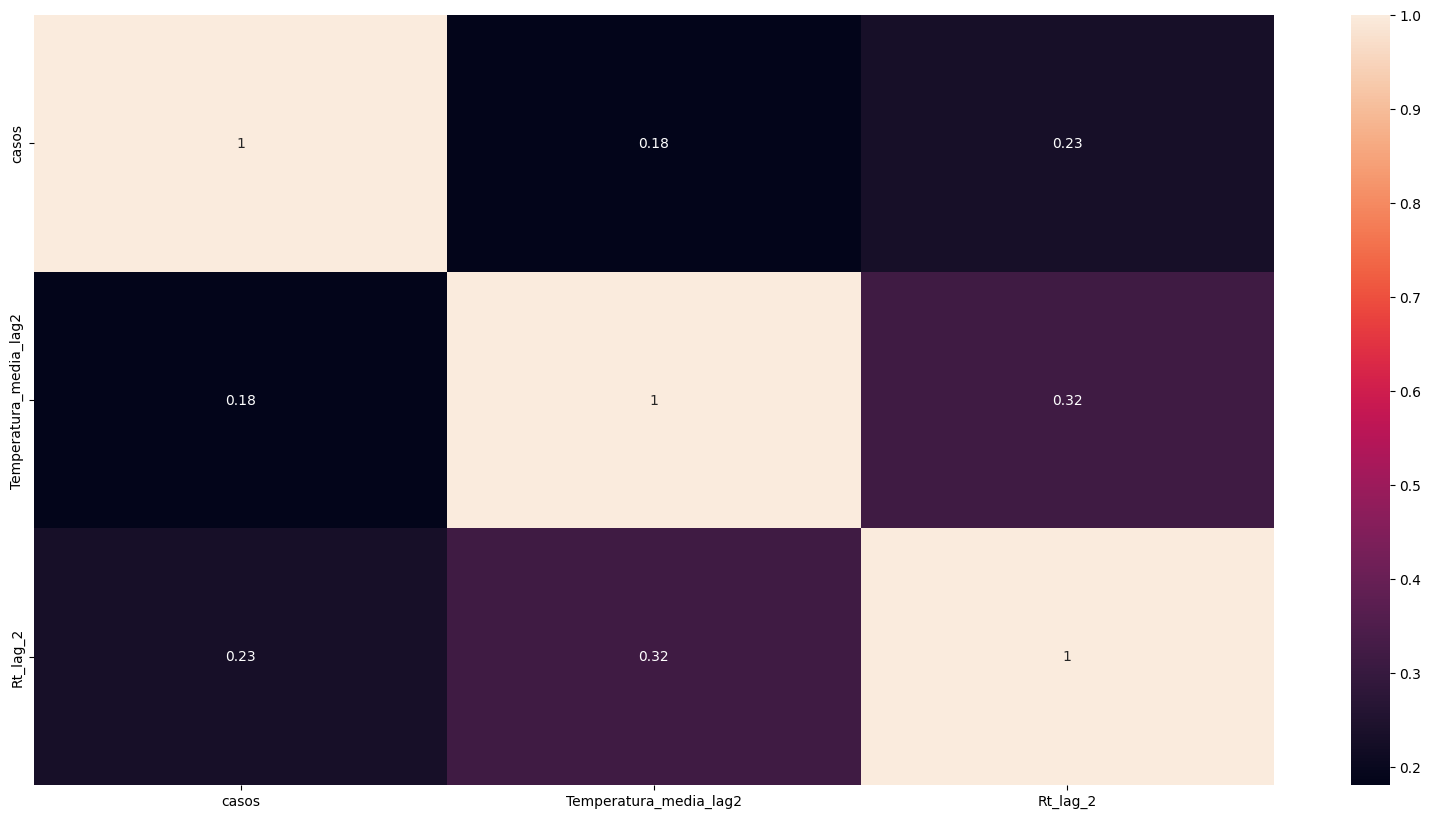

In [ ]:
# Criar as variáveis defasadas de Precipitação e Temperatura média em duas observações
df_rp['Temperatura_media_lag2'] = df_rp['tempmed'].shift(2)
df_rp['Rt_lag_2'] = df_rp['Rt'].shift(2)

# Remover linhas com NaN resultantes do lag
df_rp_lagged = df_rp.dropna(subset=['Temperatura_media_lag2', 'casos', 'Rt_lag_2'])

# Calculando a correlação entre 'casos' e as variáveis defasadas
corr = df_rp_lagged[['casos', 'Temperatura_media_lag2', 'Rt_lag_2']].corr()

plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True) # Mapa de calor, onde  annot insere os valores dentro das ilhas

Indicativo de uma correlação fraca entre as variáveis.

**Correlação cruzada:** observa a interação entre duas séries temporais em diferentes lags.

In [ ]:
cross_corr = np.correlate(df_rp['casos'], df_rp['tempmed'], mode='full')
cross_corr

array([ 6992.31106667, 16817.2212619 , 30022.55433333, ...,
       19848.489828  , 11013.55825971,  3108.96856029])

**Dinamic Time Warping(DTW):** mede a similaridade entre duas séries levando em consideração o espaçamento entre as observações.

In [ ]:
from dtaidistance import dtw
distance = dtw.distance(df_rp['casos'], df_rp['Rt'])
distance

26039.850925815954

**Distância euclidiana:** leva em consideração o quadrado da distância entre duas observações (não muito útil no contexto de séries temporais).

In [ ]:
euclidean_distance = np.sqrt(np.sum((df_rp['casos'] - df_rp['tempmed']) ** 2))
euclidean_distance

25779.127281780424

**Correlação de lags:** corresponde ao valor máximo da correlação cruzada.

In [ ]:
lag_corr = max(cross_corr)
print(f"Correlação de lags: {lag_corr}")

Correlação de lags: 3966142.1875992143


**Causalidade de Granger:** útil na verificação da capacidade de uma série em prever a outra.

In [ ]:
# Remove rows with NaN or infinite values
df_rp_cleaned = df_rp[['casos', 'tempmed', 'Rt']].replace([np.inf, -np.inf], np.nan).dropna()

# Ensure data alignment and format for the causality test
data_for_test = np.column_stack([df_rp_cleaned['casos'], df_rp_cleaned['tempmed']])

# Perform Granger causality tests with a lag of up to 2
result = grangercausalitytests(data_for_test, maxlag=2, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.9307 , p=0.0000  , df_denom=744, df_num=1
ssr based chi2 test:   chi2=25.0313 , p=0.0000  , df=1
likelihood ratio test: chi2=24.6210 , p=0.0000  , df=1
parameter F test:         F=24.9307 , p=0.0000  , df_denom=744, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7070  , p=0.0093  , df_denom=741, df_num=2
ssr based chi2 test:   chi2=9.4775  , p=0.0087  , df=2
likelihood ratio test: chi2=9.4178  , p=0.0090  , df=2
parameter F test:         F=4.7070  , p=0.0093  , df_denom=741, df_num=2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
# Remove rows with NaN or infinite values
df_rp_cleaned = df_rp[['casos', 'tempmed', 'Rt']].replace([np.inf, -np.inf], np.nan).dropna()

# Ensure data alignment and format for the causality test
data_for_test = np.column_stack([df_rp_cleaned['casos'], df_rp_cleaned['Rt']])

# Perform Granger causality tests with a lag of up to 2
result = grangercausalitytests(data_for_test, maxlag=2, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=41.2993 , p=0.0000  , df_denom=744, df_num=1
ssr based chi2 test:   chi2=41.4658 , p=0.0000  , df=1
likelihood ratio test: chi2=40.3558 , p=0.0000  , df=1
parameter F test:         F=41.2993 , p=0.0000  , df_denom=744, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=20.6044 , p=0.0000  , df_denom=741, df_num=2
ssr based chi2 test:   chi2=41.4869 , p=0.0000  , df=2
likelihood ratio test: chi2=40.3744 , p=0.0000  , df=2
parameter F test:         F=20.6044 , p=0.0000  , df_denom=741, df_num=2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


**Coherence:** verifica a periodocidade das séries.

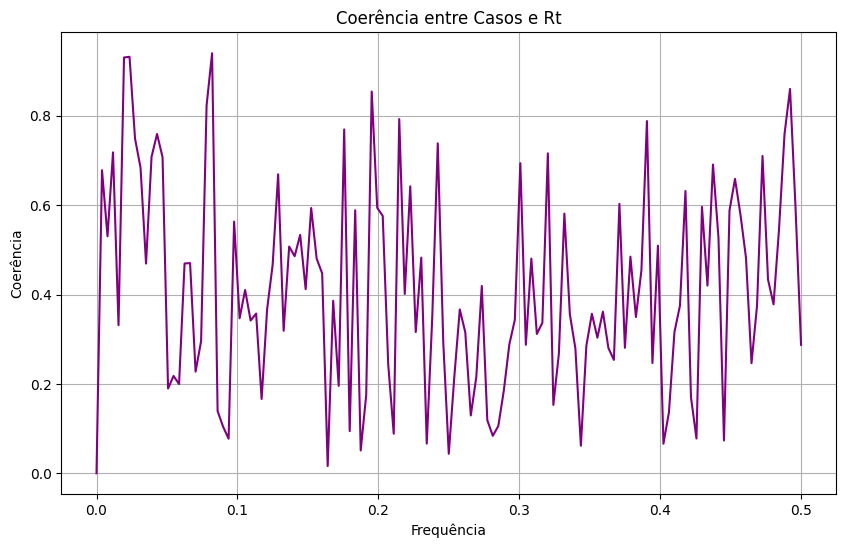

In [ ]:
from scipy.signal import coherence

# Drop NaN and infinite values in 'casos' and 'tempmed'
df_rp_cleaned = df_rp[['casos', 'Rt']].replace([np.inf, -np.inf], np.nan).dropna()

# Calculate coherence between 'casos' and 'tempmed'
frequencies, coherence_values = coherence(df_rp_cleaned['casos'], df_rp_cleaned['Rt'], fs=1)

# Plot the coherence
plt.figure(figsize=(10, 6))
plt.plot(frequencies, coherence_values, color='purple')
plt.title('Coerência entre Casos e Rt')
plt.xlabel('Frequência')
plt.ylabel('Coerência')
plt.grid(True)
plt.show()

**Similaridade do cosseno:** avalia o formato das séries com base no cosseno do ângulo formado entre elas.

In [ ]:
from scipy.spatial.distance import cosine

# Drop NaN and infinite values in 'casos' and 'Rt' and ensure alignment
df_rp_cleaned = df_rp[['casos', 'Rt']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the series as numpy arrays
casos = df_rp_cleaned['casos'].values
rt = df_rp_cleaned['Rt'].values

# Calculate cosine similarity
cosine_similarity = 1 - cosine(casos, rt)

print("Similaridade do cosseno entre 'casos' e 'Rt':", cosine_similarity)

Similaridade do cosseno entre 'casos' e 'Rt': 0.4927637834015466


**Análise de cointegração:** avalia se, no longo prazo, as séries caminham juntas.

In [ ]:
# Ensure there are no NaN or infinite values
df_rp_cleaned = df_rp[['casos', 'tempmed']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the series as numpy arrays
casos = df_rp_cleaned['casos'].values
tempmed = df_rp_cleaned['tempmed'].values

# Perform the cointegration test
coint_stat, p_value, critical_values = coint(casos, tempmed)

# Display results
print("Estatística do teste de cointegração:", coint_stat)
print("valor-p:", p_value)
print("Valores críticos (1%, 5%, 10%):", critical_values)

# Interpretation based on p-value or critical values
if p_value < 0.05:
    print("As séries 'casos' e 'tempmed' provavelmente são cointegradas (rejeita a hipótese nula).")
else:
    print("As séries 'casos' e 'tempmed' não são cointegradas (não rejeitamos a hipótese nula).")

Estatística do teste de cointegração: -6.876018841463629
valor-p: 1.6878832369748097e-08
Valores críticos (1%, 5%, 10%): [-3.91116126 -3.34432175 -3.05013252]
As séries 'casos' e 'tempmed' provavelmente são cointegradas (rejeita a hipótese nula).


In [ ]:
# Ensure there are no NaN or infinite values
df_rp_cleaned = df_rp[['casos', 'Rt']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the series as numpy arrays
casos = df_rp_cleaned['casos'].values
Rt = df_rp_cleaned['Rt'].values

# Perform the cointegration test
coint_stat, p_value, critical_values = coint(casos, Rt)

# Display results
print("Estatística do teste de cointegração:", coint_stat)
print("valor-p:", p_value)
print("Valores críticos (1%, 5%, 10%):", critical_values)

# Interpretation based on p-value or critical values
if p_value < 0.05:
    print("As séries 'casos' e 'Rt' provavelmente são cointegradas (rejeita a hipótese nula).")
else:
    print("As séries 'casos' e 'Rt' não são cointegradas (não rejeitamos a hipótese nula).")

Estatística do teste de cointegração: -6.679257360752976
valor-p: 4.8701622050706125e-08
Valores críticos (1%, 5%, 10%): [-3.91090844 -3.34418142 -3.05003524]
As séries 'casos' e 'Rt' provavelmente são cointegradas (rejeita a hipótese nula).
